In [ ]:
!git clone https://github.com/jonbarron/hist_thresh.git

Cloning into 'hist_thresh'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 73 (delta 20), reused 33 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (73/73), 8.69 MiB | 7.05 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os


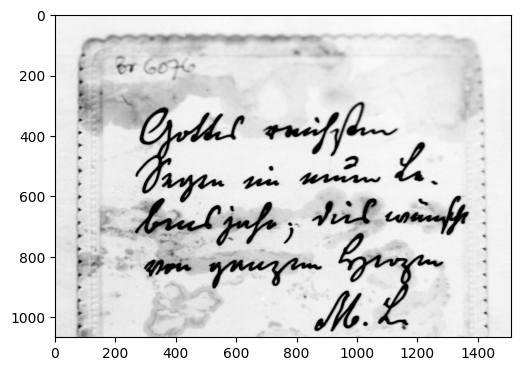

In [ ]:

root=os.getcwd()
imgPath = os.path.join(root,'/content/hist_thresh/HDIBCO2016/images/0.png')

imgGray = cv.imread(imgPath,cv.IMREAD_GRAYSCALE)
# increase plot size
plt.rcParams["figure.figsize"] = (20,20)
plt.subplot(131)
plt.imshow(imgGray,cmap='gray')
plt.show()




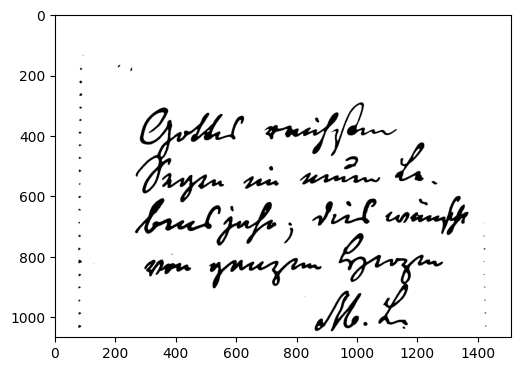

In [ ]:
plt.subplot(132)
thres = 70
maxVal = 255
_,imgThresh = cv.threshold(imgGray,thres,maxVal,cv.THRESH_BINARY)
plt.rcParams["figure.figsize"] = (20,20)
plt.imshow(imgThresh,cmap='gray')
plt.show()

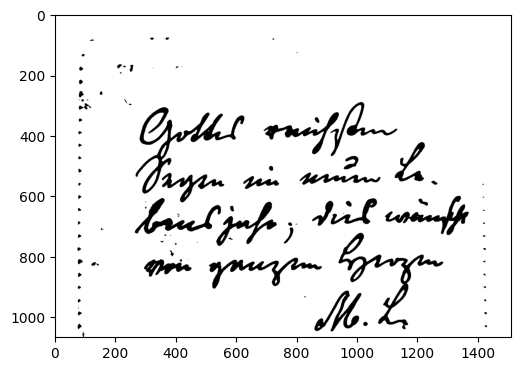

In [ ]:
plt.subplot(133)
arbThres = 0
_,imgOtsu = cv.threshold(imgGray,arbThres,maxVal,cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.rcParams["figure.figsize"] = (20,20)
plt.imshow(imgOtsu,cmap='gray')
plt.show()

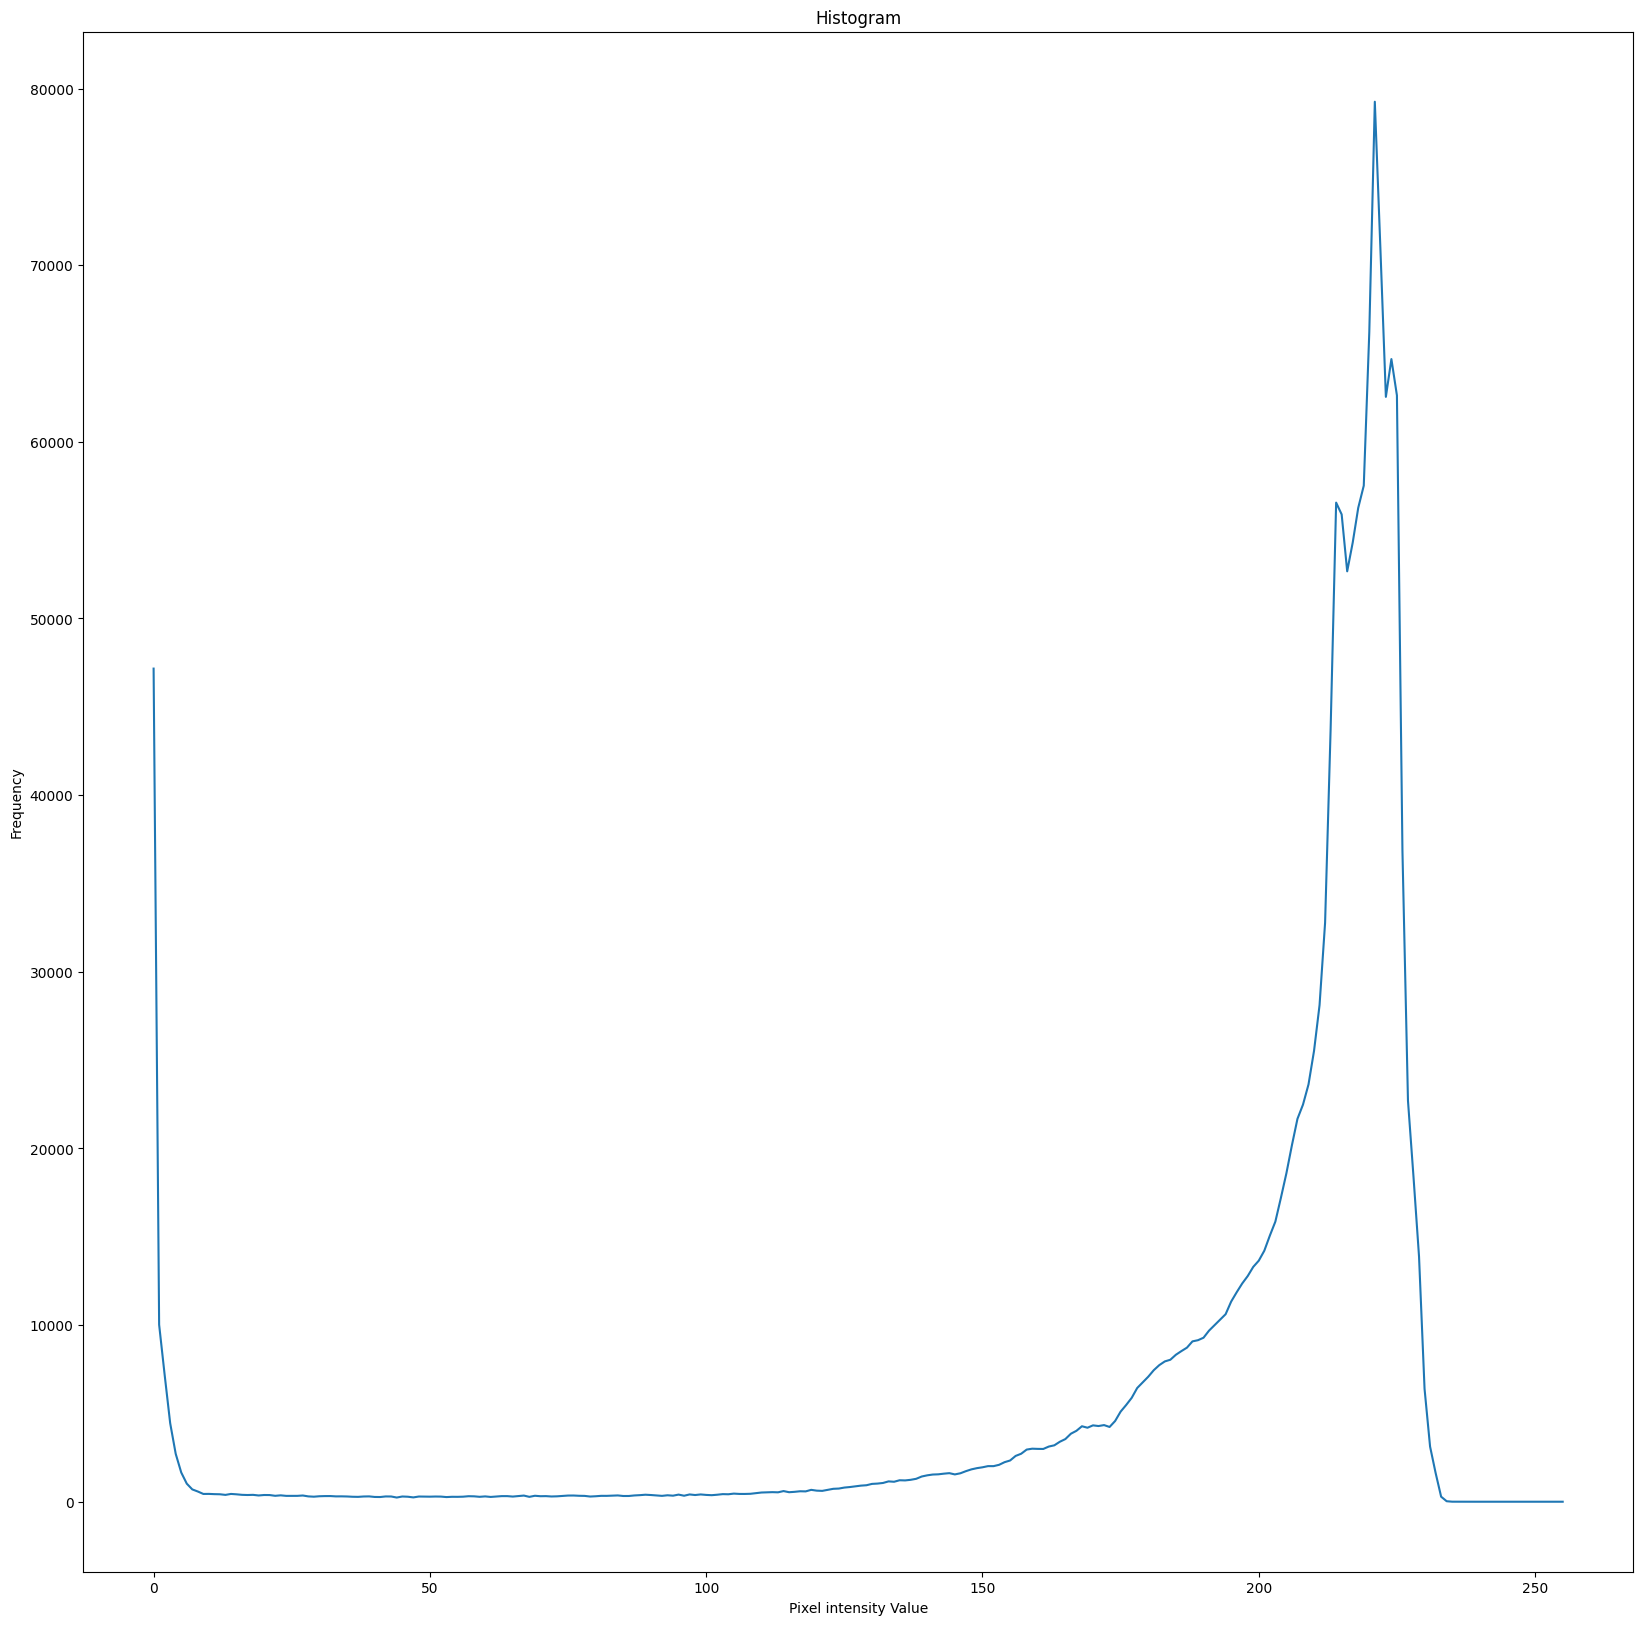

In [ ]:
hist = cv.calcHist([imgGray],[0],None,[256],[0,256])
plt.plot(hist)
plt.rcParams["figure.figsize"] = (1,1)
plt.xlabel('Pixel intensity Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()


In [ ]:
# load images in a loop from the folder : /content/hist_thresh/HDIBCO2016/images

import os
import cv2 as cv
import time

# Folder path
folder_path = '/content/hist_thresh/HDIBCO2016/images'

# List to hold the images
images = []



# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".tif"):  # Add more extensions if needed
        # Construct full file path
        file_path = os.path.join(folder_path, filename)

        # Load image as gray
        image = cv.imread(file_path,cv.IMREAD_GRAYSCALE)

        # Check if the image was loaded successfully
        if image is not None:
            images.append(image)
        else:
            print(f"Failed to load {filename}")

# Check how many images were loaded
print(f"Total images loaded: {len(images)}")



Total images loaded: 10


In [ ]:
# for image in images:
#   plt.subplot(133)
#   arbThres = 0
#   _,imgOtsu = cv.threshold(image,arbThres,maxVal,cv.THRESH_BINARY+cv.THRESH_OTSU)

#   plt.imshow(imgOtsu,cmap='gray')
#   plt.show()


In [ ]:
# for image in images:


#   num_thresholds = 3
#   thresholds = []
#   hist, bins = np.histogram(image.flatten(), 256, [0,256])

#   for _ in range(num_thresholds):
#       current_max, threshold = 0, 0
#       sumB, wB, wF = 0.0, 0.0, 0.0
#       sum1 = np.dot(hist, np.arange(256))

#       total = sum(hist)
#       for i in range(256):
#           wB += hist[i]
#           if wB == 0:
#               continue
#           wF = total - wB
#           if wF == 0:
#               break

#           sumB += i * hist[i]
#           mB = sumB / wB
#           mF = (sum1 - sumB) / wF

#           between = wB * wF * (mB - mF) ** 2

#           if between > current_max:
#               current_max = between
#               threshold = i

#       thresholds.append(threshold)
#       hist[threshold:] = 0  # Exclude pixels above the current threshold

#   thresholded_image = np.digitize(image, thresholds) * (255 // len(thresholds))
#   # make black as white and white as black
#   thresholded_image = 255 - thresholded_image

#   plt.rcParams["figure.figsize"] = (10,10)
#   plt.imshow(thresholded_image,cmap='gray')
#   plt.show()


In [ ]:
# for image in images:


#         # First stage: Coarse thresholding on a subsampled image
#         subsample = cv.resize(image, (image.shape[1] // 4, image.shape[0] // 4))
#         # Ensure coarse_threshold is a scalar
#         coarse_threshold, _ = cv.threshold(subsample, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

#         # Second stage: Fine-tune around the coarse threshold
#         low, high = max(int(coarse_threshold) - 10, 0), min(int(coarse_threshold) + 10, 255)
#         hist = cv.calcHist([image], [0], None, [256], [0, 256])
#         hist = hist[low:high]
#         cdf = hist.cumsum()

#         total = cdf[-1]
#         sumB, wB, max_var, best_threshold = 0, 0, 0, 0
#         sum1 = np.dot(np.arange(low, high), hist.flatten())

#         for t in range(low, high):
#             wB += hist[t - low]
#             wF = total - wB
#             if wB == 0 or wF == 0:
#                 continue
#             sumB += t * hist[t - low]
#             mB = sumB / wB
#             mF = (sum1 - sumB) / wF
#             between_var = wB * wF * (mB - mF) ** 2

#             if between_var > max_var:
#                 max_var = between_var
#                 best_threshold = t

#         _, thresholded_image = cv.threshold(image, best_threshold, 255, cv.THRESH_BINARY)

#         plt.rcParams["figure.figsize"] = (10, 10)
#         plt.imshow(thresholded_image, cmap='gray')
#         plt.title(f'Thresholded Image: {filename}')
#         plt.show()

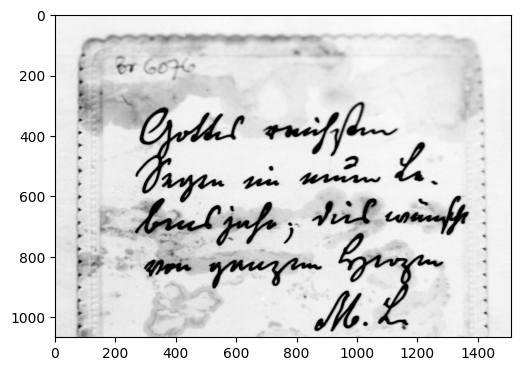

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)
plt.subplot(131)
plt.imshow(imgGray,cmap='gray')
plt.show()

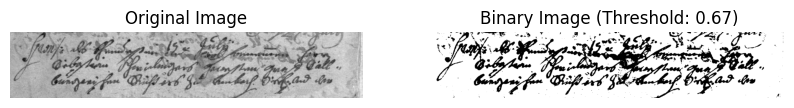

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters

def apply_otsu_threshold(image):
    """
    Apply Otsu's thresholding to the image and return the binary image.
    """
    otsu_threshold = filters.threshold_otsu(image)
    binary_image = image >= otsu_threshold
    return binary_image, otsu_threshold

# Read the image
image = io.imread('/content/hist_thresh/HDIBCO2016/images/7.png')  # Change to your image path

# Convert to grayscale if it's a colored image
if len(image.shape) == 3:
    image = color.rgb2gray(image)

# Ensure the image is in the range [0, 1] for thresholding
image = np.clip(image, 0, 1)

# Apply Otsu's thresholding
binary_image, otsu_threshold = apply_otsu_threshold(image)

# Display the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Binary Image (Threshold: {otsu_threshold:.2f})")
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.show()


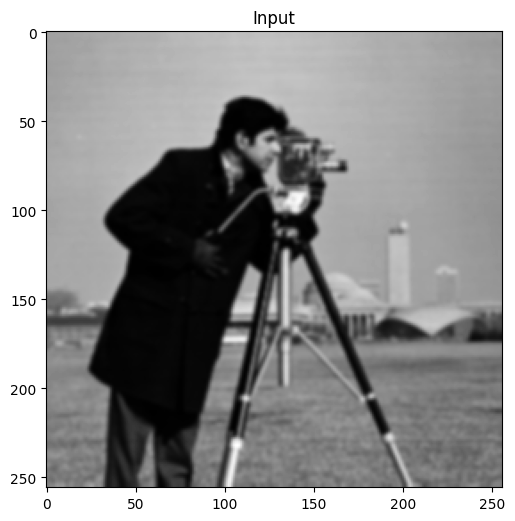

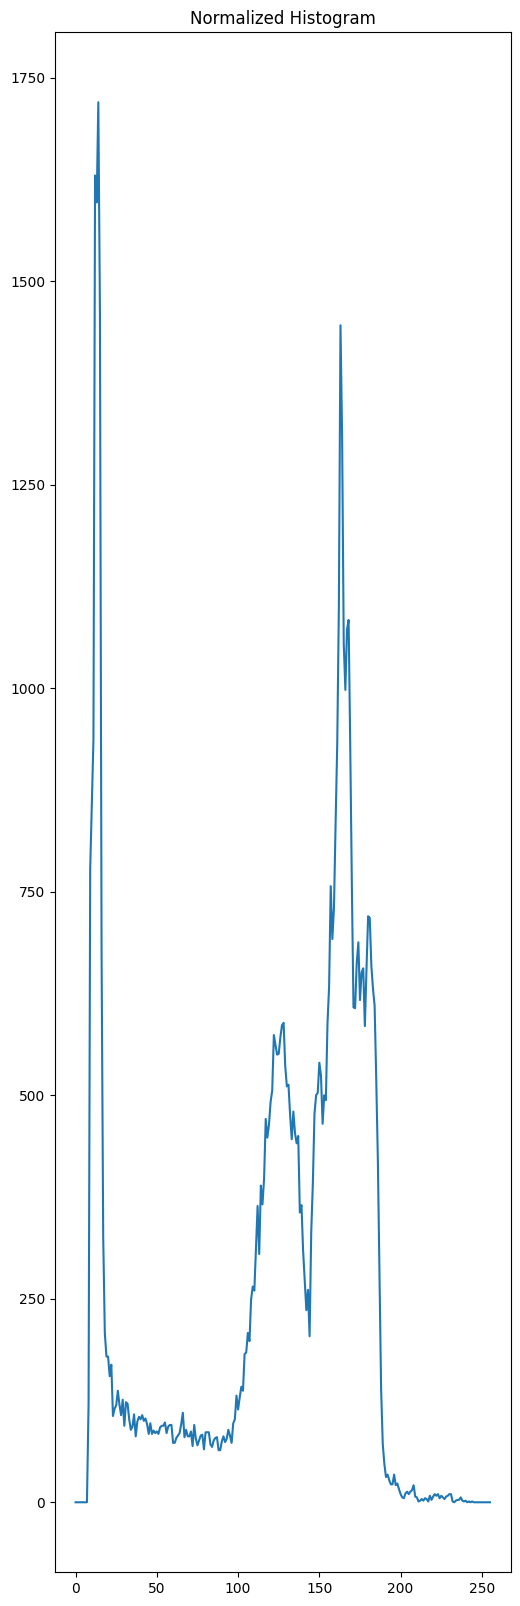

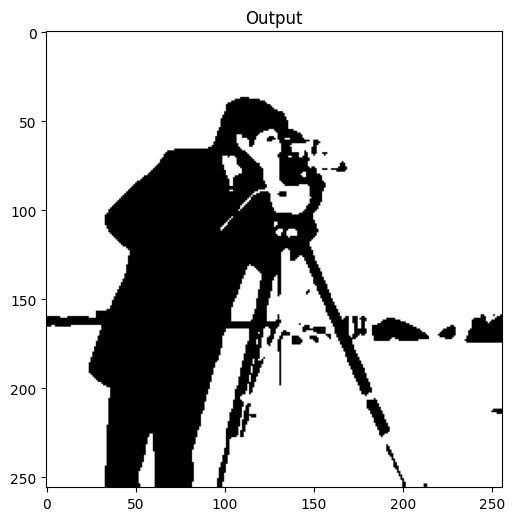

In [ ]:
# Image Loading and Blurring:

# The image is loaded in grayscale mode.
# A Gaussian blur is applied to reduce noise, which can help in achieving better binarization results.
# Histogram Calculation:

# The histogram of the blurred image is calculated. This histogram counts the number of pixels for each intensity level (0-255).
# Histogram Normalization:

# The histogram is normalized, which means the count of pixels at each intensity level is divided by the maximum count. This helps in comparing probabilities directly.
# Cumulative Distribution Function (CDF):

# The CDF is calculated, which is the cumulative sum of the normalized histogram. It represents the cumulative probability distribution of pixel intensities.
# Manual Otsu Thresholding:

# The code loops through all possible threshold values (1-255).
# For each threshold, the image is split into two classes: one below the threshold and one above.
# The mean and variance for both classes are calculated.
# The within-class variance is minimized to find the optimal threshold.
# Binarization Using OpenCV’s Otsu Method:

# The OpenCV function is used to binarize the image using Otsu's method.
# The resulting binary image is then displayed.

import numpy as np
import cv2
from matplotlib import pyplot as plt

# Load the image in grayscale mode
imag = cv2.imread('/content/hist_thresh/HDIBCO2016/images/cameraman.png', 0)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(imag, (5, 5), 0)

# Display the blurred input image
plt.rcParams["figure.figsize"] = (20,20)
plt.subplot(131)
plt.imshow(blurred, 'gray')
plt.title('Input')
plt.show()

# Calculate the histogram of the image
histogram = cv2.calcHist([blurred], [0], None, [256], [0, 256])

# Plot the normalized histogram
plt.rcParams["figure.figsize"] = (20,20)
plt.subplot(131)
plt.plot(histogram)
plt.title('Normalized Histogram')
plt.show()

# Normalize the histogram
hist_normalize = histogram.ravel() / histogram.max()

# Calculate the cumulative distribution function (CDF)
Q = hist_normalize.cumsum()

x_axis = np.arange(256)
mini = np.inf
thresh = -1

# Implement Otsu's method manually
for i in range(1, 256):
    # Probabilities for the two classes
    p1, p2 = np.hsplit(hist_normalize, [i])

    # Cumulative sums for the two classes
    q1, q2 = Q[i], Q[255] - Q[i]

    # Avoid division by zero
    if q1 == 0 or q2 == 0:
        continue

    # Weights (x-axis values split)
    b1, b2 = np.hsplit(x_axis, [i])

    # Means and variances
    m1, m2 = np.sum(p1 * b1) / q1, np.sum(p2 * b2) / q2
    v1, v2 = np.sum(((b1 - m1) ** 2) * p1) / q1, np.sum(((b2 - m2) ** 2) * p2) / q2

    # Calculate the minimization function (within-class variance)
    fn = v1 * q1 + v2 * q2
    if fn < mini:
        mini = fn
        thresh = i

# Binarize the image using OpenCV's Otsu method
ret, binarized = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the binary output image
plt.rcParams["figure.figsize"] = (20,20)
plt.subplot(131)
plt.imshow(binarized, 'gray')

plt.title('Output')
plt.show()


In [ ]:
for image in images:


  num_thresholds = 3
  thresholds = []
  hist, bins = np.histogram(image.flatten(), 256, [0,256])

  for _ in range(num_thresholds):
      current_max, threshold = 0, 0
      sumB, wB, wF = 0.0, 0.0, 0.0
      sum1 = np.dot(hist, np.arange(256))

      total = sum(hist)
      for i in range(256):
          wB += hist[i]
          if wB == 0:
              continue
          wF = total - wB
          if wF == 0:
              break

          sumB += i * hist[i]
          mB = sumB / wB
          mF = (sum1 - sumB) / wF

          between = wB * wF * (mB - mF) ** 2

          if between > current_max:
              current_max = between
              threshold = i

      thresholds.append(threshold)
      hist[threshold:] = 0  # Exclude pixels above the current threshold

  thresholded_image = np.digitize(image, thresholds) * (255 // len(thresholds))
  # make black as white and white as black
  thresholded_image = 255 - thresholded_image

  plt.rcParams["figure.figsize"] = (10,10)
  plt.imshow(thresholded_image,cmap='gray')
  plt.show()



# multilevel otsu

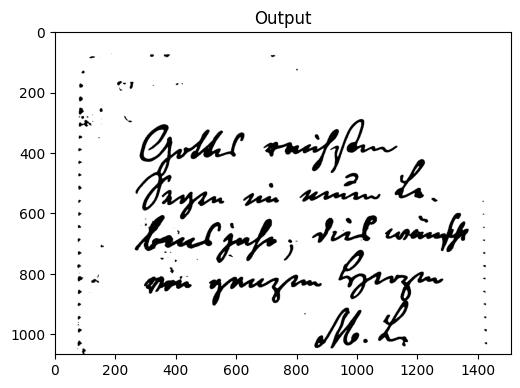

In [ ]:
#1. Gradient Calculation: The Sobel operator computes gradients in the x and y directions to measure changes in intensity. The magnitude of these gradients helps identify edges in the image.
# Histogram Computation: A 2D histogram is built where each bin counts how often a specific pair of pixel intensity and gradient magnitude occurs.

# Step 2: Compute Integral Images
# Integral Images: These are cumulative sums of the histogram. They allow for efficient computation of sums over sub-regions of the histogram:
# iiN is the integral image of pixel counts.
# iiO is the integral image of pixel intensity values.
# iiG is the integral image of gradient magnitudes.

# Step 3: Calculate the Average Vectors
# Average Vectors Calculation:
# m0 is the average vector for pixels below or at the threshold (s, t).
# m1 is the average vector for pixels above the threshold.
# mT is the average vector for the entire image.
# Checks are included to handle cases where the denominator in the calculation is zero to avoid invalid divisions.

# Step 4: Compute the Between-Class Scatter Matrix and Trace
# Between-Class Scatter Matrix:
# The trace of the scatter matrix measures how well-separated the two classes (foreground and background) are.
# P0 and P1 are the probabilities of pixels being in classes 0 and 1, respectively.


# Step 5: Determine the Optimal Threshold
# Optimal Threshold Finding:
# Iterate over all possible thresholds (s, t).
# Compute the between-class scatter matrix's trace for each threshold.
# Choose the threshold that maximizes this trace, indicating the best separation between classes.

# Summary
# Calculate 2D Histogram: Capture how often each pair of pixel intensity and gradient magnitude occurs.
# Compute Integral Images: Facilitate efficient calculations for sums over regions of the histogram.
# Calculate Average Vectors: Determine average values for pixels below/at and above the threshold.
# Compute Between-Class Scatter Matrix: Measure class separability using the scatter matrix's trace.
# Find Optimal Threshold: Identify the threshold that maximizes class separation.
# This approach provides a robust method for image binarization, particularly effective in distinguishing regions based on intensity and gradient magnitude.


import numpy as np
from scipy.ndimage import sobel
from skimage import io, color
import matplotlib.pyplot as plt

def calculate_2d_histogram(image):
    M, N = image.shape
    L = 256  # Assuming 8-bit grayscale image

    histogram = np.zeros((L, L), dtype=np.int64)

    # Calculate the gradient using Sobel operator
    gradient_x = sobel(image, axis=0)
    gradient_y = sobel(image, axis=1)
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    # Iterate through each pixel to fill the histogram
    for x in range(M):
        for y in range(N):
            i = image[x, y]
            j = int(abs(image[x, y] - gradient_magnitude[x, y]))
            histogram[i, j] += 1

    return histogram

def compute_integral_images(histogram):
    iiN = np.cumsum(np.cumsum(histogram, axis=0), axis=1)
    iiO = np.cumsum(np.cumsum(np.arange(histogram.shape[0]).reshape(-1, 1) * histogram, axis=0), axis=1)
    iiG = np.cumsum(np.cumsum(np.arange(histogram.shape[1]).reshape(1, -1) * histogram, axis=0), axis=1)

    return iiN, iiO, iiG

def calculate_average_vectors(iiN, iiO, iiG, s, t):
    # Handle cases where iiN[s, t] might be zero
    if iiN[s, t] == 0:
        m0 = np.array([0, 0])
    else:
        m0 = np.array([iiO[s, t] / iiN[s, t], iiG[s, t] / iiN[s, t]])

    # Handle cases where the denominator might be zero
    if iiN[-1, -1] == iiN[s, t]:
        m1 = np.array([0, 0])
    else:
        m1 = np.array([(iiO[-1, -1] - iiO[s, t]) / (iiN[-1, -1] - iiN[s, t]),
                       (iiG[-1, -1] - iiG[s, t]) / (iiN[-1, -1] - iiN[s, t])])

    mT = np.array([iiO[-1, -1] / iiN[-1, -1], iiG[-1, -1] / iiN[-1, -1]])

    return m0, m1, mT

def calculate_trace_sb(P0, P1, m0, m1, mT):
    trace_sb = P0 * np.sum((m0 - mT) ** 2) + P1 * np.sum((m1 - mT) ** 2)
    return trace_sb

def find_optimal_threshold(histogram, iiN, iiO, iiG):
    max_trace_sb = 0
    optimal_s, optimal_t = 0, 0

    for s in range(histogram.shape[0]):
        for t in range(histogram.shape[1]):
            P0 = iiN[s, t] / (histogram.shape[0] * histogram.shape[1])
            P1 = (iiN[-1, -1] - iiN[s, t]) / (histogram.shape[0] * histogram.shape[1])
            m0, m1, mT = calculate_average_vectors(iiN, iiO, iiG, s, t)
            trace_sb = calculate_trace_sb(P0, P1, m0, m1, mT)
            if trace_sb > max_trace_sb:
                max_trace_sb = trace_sb
                optimal_s, optimal_t = s, t

    return optimal_s, optimal_t

def otsu_2d_binarization(image):
    # Step 1: Calculate the 2D Histogram
    histogram = calculate_2d_histogram(image)

    # Step 2: Compute Integral Images
    iiN, iiO, iiG = compute_integral_images(histogram)

    # Step 3: Find the Optimal Threshold
    optimal_s, optimal_t = find_optimal_threshold(histogram, iiN, iiO, iiG)

    # Step 4: Binarize the Image
    binary_image = (image >= optimal_s).astype(np.uint8) * 255

    return binary_image

# Example usage
def binarize_image(input_image_path):
    # Load the image
    image = io.imread(input_image_path)

    # Convert to grayscale if the image is colored
    if len(image.shape) == 3:
        image = color.rgb2gray(image)
        image = (image * 255).astype(np.uint8)  # Scale to 8-bit

    # Apply 2D Otsu binarization
    binary_image = otsu_2d_binarization(image)

    return binary_image

# Example call to the function
input_image_path = '/content/hist_thresh/HDIBCO2016/images/0.png'
binary_image = binarize_image(input_image_path)

# The 'binary_image' now contains the binarized output.
plt.rcParams["figure.figsize"] = (20,20)
plt.subplot(131)
plt.imshow(binary_image, 'gray')
plt.title('Output')
plt.show()
